<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01374849/blob/main/A01374849_Actividad_Semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 6, visualización
# Roberto Ferro Salinas
# A01374849
# Ciencia y analítica de datos
# PHD María de la Paz Rico Fernández
# 1 de noviembre de 2022

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import seaborn as sns

# 1. Descarga los datos y carga el dataset en tu libreta.

In [110]:
credit = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

credit_df = pd.read_csv(Credit)
df = credit_df.copy()
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


# 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [111]:
df.shape

(30000, 25)

In [112]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [113]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [114]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [116]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [117]:
df.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

# 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [118]:
#Quitamos las categóricas (X)
ndf = df.copy()
ndf.drop("ID", inplace=True, axis=1)
ndf.drop("X2", inplace=True, axis=1)
ndf.drop("X3", inplace=True, axis=1)
ndf.drop("X4", inplace=True, axis=1)
ndf.drop("X5", inplace=True, axis=1)
ndf.drop("X6", inplace=True, axis=1)
ndf.drop("X7", inplace=True, axis=1)
ndf.drop("X8", inplace=True, axis=1)
ndf.drop("X9", inplace=True, axis=1)
ndf.drop("X10", inplace=True, axis=1)
ndf.drop("X11", inplace=True, axis=1)
ndf

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [119]:
# Medias
ndf.mean()

X1     167484.322667
X12     51236.862750
X13     49190.734669
X14     47025.350152
X15     43275.652326
X16     40324.493980
X17     38881.135745
X18      5662.945886
X19      5922.488913
X20      5225.623400
X21      4827.252526
X22      4800.297209
X23      5216.259977
Y           0.221189
dtype: float64

In [120]:
ndf.X12.fillna(ndf.X12.mean(), inplace=True)
ndf.X13.fillna(ndf.X13.mean(), inplace=True)
ndf.X14.fillna(ndf.X14.mean(), inplace=True)
ndf.X15.fillna(ndf.X15.mean(), inplace=True)
ndf.X16.fillna(ndf.X16.mean(), inplace=True)
ndf.X17.fillna(ndf.X17.mean(), inplace=True)
ndf.X18.fillna(ndf.X18.mean(), inplace=True)
ndf.X19.fillna(ndf.X19.mean(), inplace=True)
ndf.X20.fillna(ndf.X20.mean(), inplace=True)
ndf.X21.fillna(ndf.X21.mean(), inplace=True)
ndf.X22.fillna(ndf.X22.mean(), inplace=True)
ndf.X23.fillna(ndf.X23.mean(), inplace=True)
ndf.Y.fillna(ndf.Y.mean(), inplace=True)

In [121]:
ndf.isna().any()

X1     False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

# 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [122]:
ndf.describe()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,73631.715966,71170.333204,6.934583e+04,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,3566.750000,2986.750000,2.674750e+03,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,140000.000000,22400.000000,21228.500000,2.010800e+04,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Las medidas obtenidas con este comando tienen el siguiente significado:
- count: cuenta total de datos
- mean: promedio de cada columna
- std: desviación estándar, que es una medida de la dispersión de los datos
- min: valor minimo
- 25%: Q1 (cuartil 1)
- 50%: Q2 (cuartil 2)
- 75%: Q3 (cuartil 3)
- max: valor máximo

# 5. Realiza el conteo de las variables categóricas

Anteriormente eliminamos todas las variables categóricas, ya que no son útiles para los análisis que realizaremos posteriormente. Estas variables son X2-X11, que contienen el género, nivel de estudios, entre otros.

In [123]:
r = (2,3,4,6,7,8,9,10)
for i in r:
  print('------ \n X{}:'.format(i),' ',df['X'+str(i)].value_counts())

------ 
 X2:   2.0    18112
1.0    11887
Name: X2, dtype: int64
------ 
 X3:   2.0    14030
1.0    10585
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64
------ 
 X4:   2.0    15964
1.0    13657
3.0      323
0.0       54
Name: X4, dtype: int64
------ 
 X6:    0.0    14736
-1.0     5684
 1.0     3688
-2.0     2759
 2.0     2667
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64
------ 
 X7:    0.0    15728
-1.0     6047
 2.0     3927
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64
------ 
 X8:    0.0    15761
-1.0     5935
-2.0     4085
 2.0     3819
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: X8, dtype: int64
------ 
 X9:    0.0    16450
-1.0     5685
-2.0     4348
 2.0     3157
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5


# 6. Escala los datos, si consideras necesario.

In [124]:
scaled=minmax_scale(ndf.dropna(axis=0))

# 7. Reduce las dimensiones con PCA, si consideras necesario.

In [125]:
pcs = PCA()
pcs.fit(scaled)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,0.415599,0.150996,0.109653,0.036782,0.033694,0.031936,0.024789,0.020966,0.018755,0.015608,0.011997,0.010432,0.008622,0.006168
Proportion of variance,0.810643,0.107006,0.056432,0.006350,0.005328,0.004787,0.002884,0.002063,0.001651,0.001143,0.000675,0.000511,0.000349,0.000179
Cumulative proportion,0.810643,0.917649,0.974081,0.980430,0.985758,0.990545,0.993429,0.995492,0.997143,0.998286,0.998962,0.999473,0.999821,1.000000


## 1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

Como se puede observar, es con el componente principal 1 en donde concentramos el 81.1% de la varianza aprox., por lo que con él podemos determinar las variables más importantes. Si incluimos el componente 2 podemos ver 

## 2. Indica la importancia de las variables en cada componente

In [126]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,0.4156,0.1510,0.1097,0.0368,0.0337,0.0319,0.0248,0.0210,0.0188,0.0156,0.0120,0.0104,0.0086,0.0062
Proportion of variance,0.8106,0.1070,0.0564,0.0063,0.0053,0.0048,0.0029,0.0021,0.0017,0.0011,0.0007,0.0005,0.0003,0.0002
Cumulative proportion,0.8106,0.9176,0.9741,0.9804,0.9858,0.9905,0.9934,0.9955,0.9971,0.9983,0.9990,0.9995,0.9998,1.0000


In [127]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.iloc[:, :].columns
                                )
pcsComponents_df.iloc[:,:]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,-0.053921,0.664879,-0.740105,-0.075078,-0.021165,-0.024966,-0.014234,-0.014140,-0.010551,-0.004146,-0.003588,0.004483,-0.001088,-0.000882
X12,-0.004177,0.340009,0.311113,-0.196267,0.423248,-0.228449,0.232062,-0.205120,0.364930,0.088014,0.310415,-0.422222,-0.053466,-0.058319
X13,-0.003433,0.356633,0.335720,-0.178845,0.327691,-0.160266,0.105546,0.278478,-0.223747,-0.270717,-0.217051,0.493839,0.102684,0.285426
X14,-0.001931,0.199920,0.184011,-0.021790,0.040807,-0.011619,-0.106644,0.104592,-0.246379,0.533630,0.008032,0.244155,0.014489,-0.704437
X15,-0.002528,0.323373,0.291205,0.028759,-0.227095,0.155124,-0.396460,0.135000,0.194243,0.187475,-0.518492,-0.295311,-0.305641,0.190838
X16,-0.002029,0.318893,0.282407,0.097394,-0.428357,0.259391,0.074376,-0.197216,-0.099503,-0.128963,0.110827,-0.130353,0.676798,-0.001256
X17,-0.001368,0.236173,0.206481,0.242080,-0.330193,-0.026540,-0.019453,-0.231919,-0.136799,-0.259932,0.432275,0.236928,-0.591349,-0.010876
X18,-0.003506,0.033383,0.004156,0.095916,0.027250,0.091526,0.051385,0.713171,-0.319727,-0.244126,0.246809,-0.473673,-0.072351,-0.130172
X19,-0.002044,0.019494,-0.001964,0.093280,-0.030778,0.063643,-0.031000,0.221809,-0.030753,0.625770,0.443992,0.123475,0.069229,0.571009
X20,-0.002856,0.034888,-0.000679,0.140342,-0.095636,0.140532,-0.019035,0.404061,0.763349,-0.147241,0.146227,0.335813,0.093620,-0.198131


In [128]:
pcsComponents_df.PC1.nlargest(7)


Y      0.998479
X17   -0.001368
X14   -0.001931
X16   -0.002029
X19   -0.002044
X15   -0.002528
X20   -0.002856
Name: PC1, dtype: float64

In [129]:
pcsComponents_df.PC2.nlargest(7)

X1     0.664879
X13    0.356633
X12    0.340009
X15    0.323373
X16    0.318893
X17    0.236173
X14    0.199920
Name: PC2, dtype: float64

Del componente principal 1 tenemos que la variable Y es la que tiene la mayor importancia por mucho, mientras que para el 2do componente principal es X1, es decir, la cantidad de crédito a otorgar. De aquí podemos ver que la variable Y no debería incluirse en el dataframe debido a que es la variable de salida que nos interesa, pero para fines de esta entrega la consideraremos como una variable más.

# 8. Elabora los histogramas de los atributos para visualizar su distribución

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


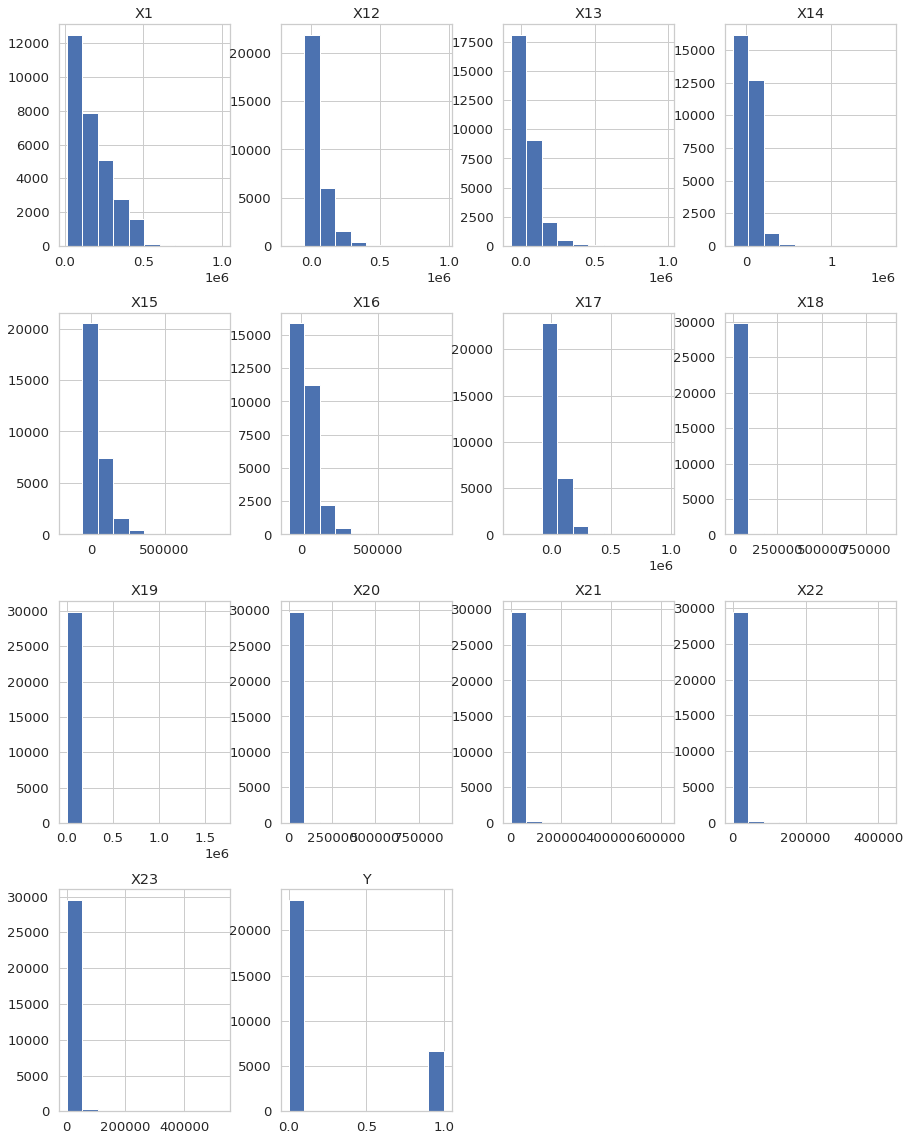

In [130]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
ndf.hist(ax=ax)
plt.show()

# 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

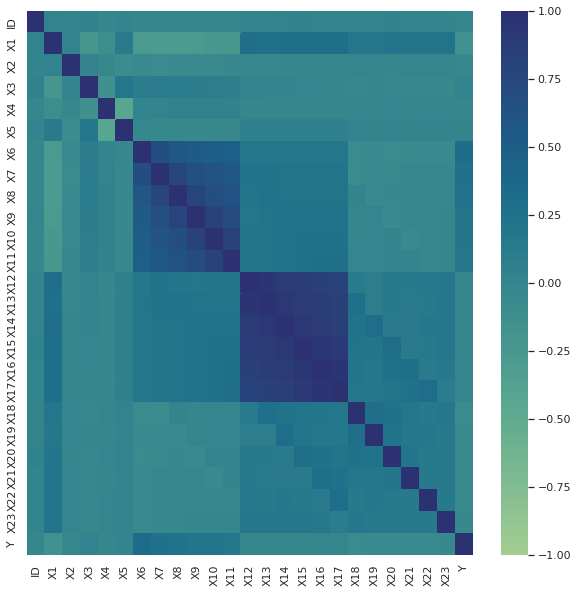

In [131]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "crest")

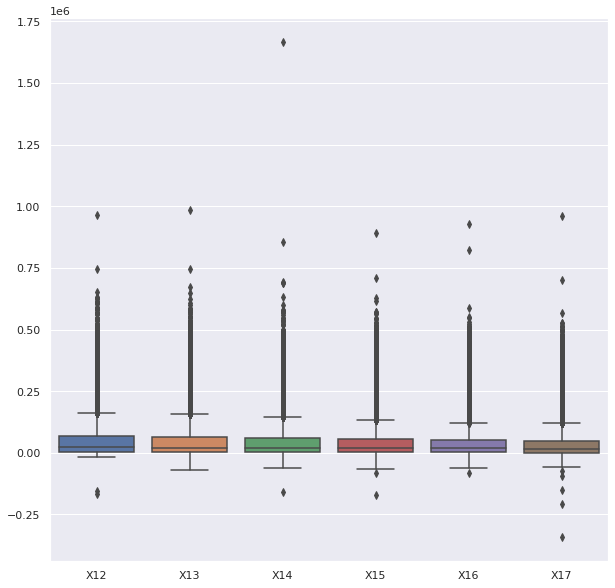

In [132]:
sns.boxplot(data=ndf[['X12',
    'X13',
    'X14',
    'X15',
    'X16',
    'X17',]])


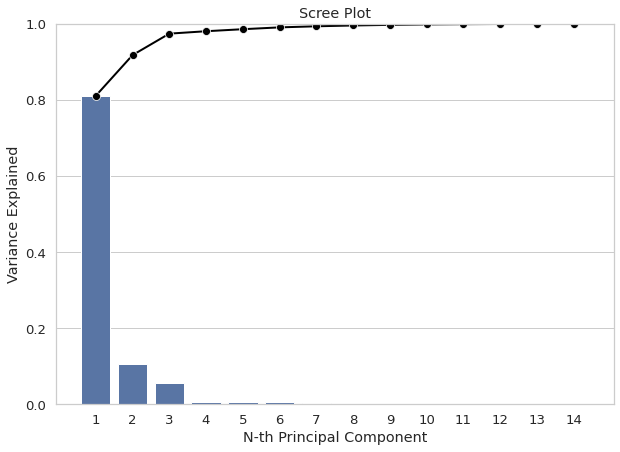

In [133]:
PC_components = np.arange(pcs.n_components_) + 1
_ = sns.set(style = 'whitegrid', font_scale = 1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x = PC_components, y = pcs.explained_variance_ratio_, color = 'b')
_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

# 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

- En la primer gráfica podemos observar cómo se distribuyen los valores encontrados en cada una de las variables de nuestra base de datos, incluyendo las variables categóricas, ya que nos ayudan a ver el panorama completo.
- En la 2da tenemos el clásico diagrama de caja y bigotes que nos muestra la información estadística de cada variable.
- Finalmente podemos ver a través del Scree Plot cómo se va acumulando la varianza tras la realización del análisis de componentes principales.

En mi opinión la más útil es la última debido a la importancia del PCA, ya que da una idea muy clara de qué variables son las de mayor peso para tomar decisiones. En este caso sobre qué factores se consideran para otorgar un crédito.